<a href="https://colab.research.google.com/github/sohaibnasser/Valmart/blob/master/objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import imutils
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/image.png
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/logs/2021.12.23/14.32.17.600672.log
/content/.config/logs/2021.12.23/14.31.34.537359.log
/content/.config/logs/2021.12.23/14.32.35.447923.log
/content/.config/logs/2021.12.23/14.32.11.074637.log
/content/.config/logs/2021.12.23/14.31.54.176680.log
/content/.config/logs/2021.12.23/14.32.36.119106.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv


In [13]:
img = cv2.imread('/content/image3.png')
img = imutils.resize(img, width=700)

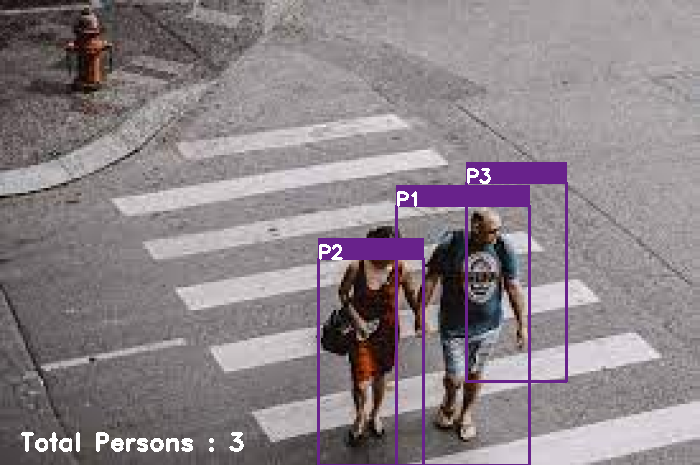

In [14]:

## Histogram of Oriented Gradients Detector
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

## USing Sliding window concept
rects, weights = HOGCV.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.03)
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
c = 1
for x, y, w, h in pick:
    cv2.rectangle(img, (x, y), (w, h), (139, 34, 104), 2)
    cv2.rectangle(img, (x, y - 20), (w,y), (139, 34, 104), -1)
    cv2.putText(img, f'P{c}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    c += 1

cv2.putText(img, f'Total Persons : {c - 1}', (20, 450), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255,255), 2)
cv2_imshow(img)
